In [1]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

# US Border Activity

We use a dataset that contains monthly temporal data for crossings into the US from both the US-Canadian border, and the US-Mexican border. In this notebook we will apply several data analysis approaches to answer questions regarding the data.

In [2]:
replace_dict = {'Border':{'US-Canada Border':'CA','US-Mexico Border':'MX'}}

border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')

border_crossing_full = border_crossing_full.replace(replace_dict)
border_crossing_full[['Month','Year']] = border_crossing_full['Date'].str.split(" ",expand=True)
border_crossing_full = border_crossing_full.drop(['Port Name','Point','Date'],axis=1)
coordless_border_crossing = border_crossing_full.drop(['Latitude','Longitude'],axis=1)

In [3]:
border_crossing_full.shape

(380467, 9)

In [4]:
#groupedState = coordless_border_crossing.groupby('State').agg('first')
#groupedState.head(15)

### 1. Comparing Canadian and Mexican entries


(-1000000.0, 250000000.0)

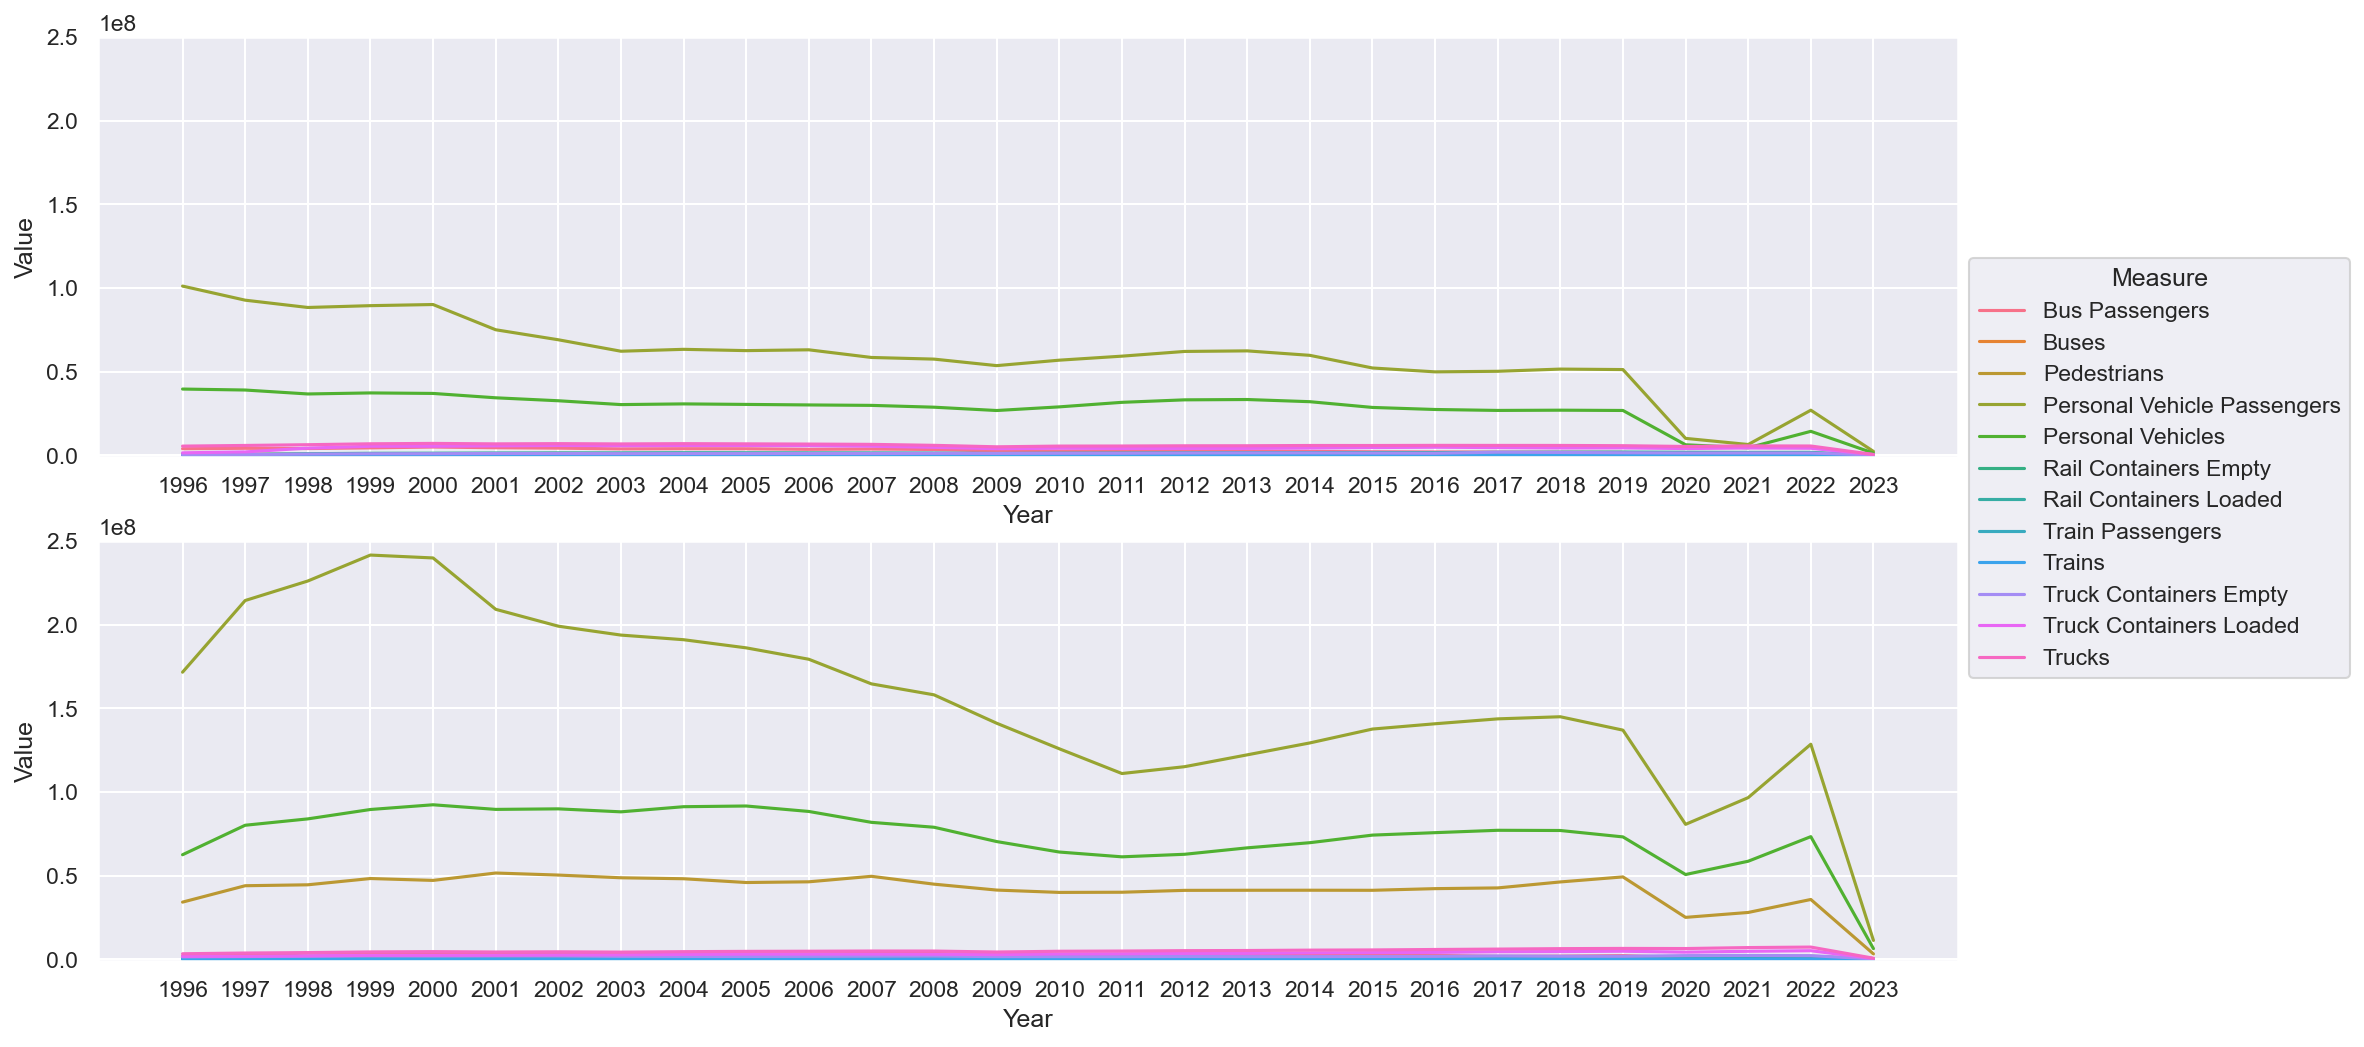

In [5]:
### CODE HERE

canadafilter = border_crossing_full['Border'] == 'CA'
mexicofilter = ~canadafilter

canadacrossings = border_crossing_full.loc[canadafilter]
mexicocrossings = border_crossing_full.loc[mexicofilter]


ymin,ymax = -1000000,250000000
fig, axs = plt.subplots(nrows=2)
canada_activity = canadacrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum)
ax = sns.lineplot(canada_activity,x='Year',y='Value',hue='Measure',ax=axs[0],legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.5))

#fig.legend(loc=7)

mexico_activity = mexicocrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum)
sns.lineplot(mexico_activity,x='Year',y='Value',hue='Measure',ax=axs[1],legend=False)
axs[0].set_ylim(ymin,ymax)
axs[1].set_ylim(ymin,ymax)


*** Observations Question 1 ***

### 2. How do the number of entries change between 1996 until now, and how will they change in the future?

<AxesSubplot: xlabel='Year', ylabel='Value'>

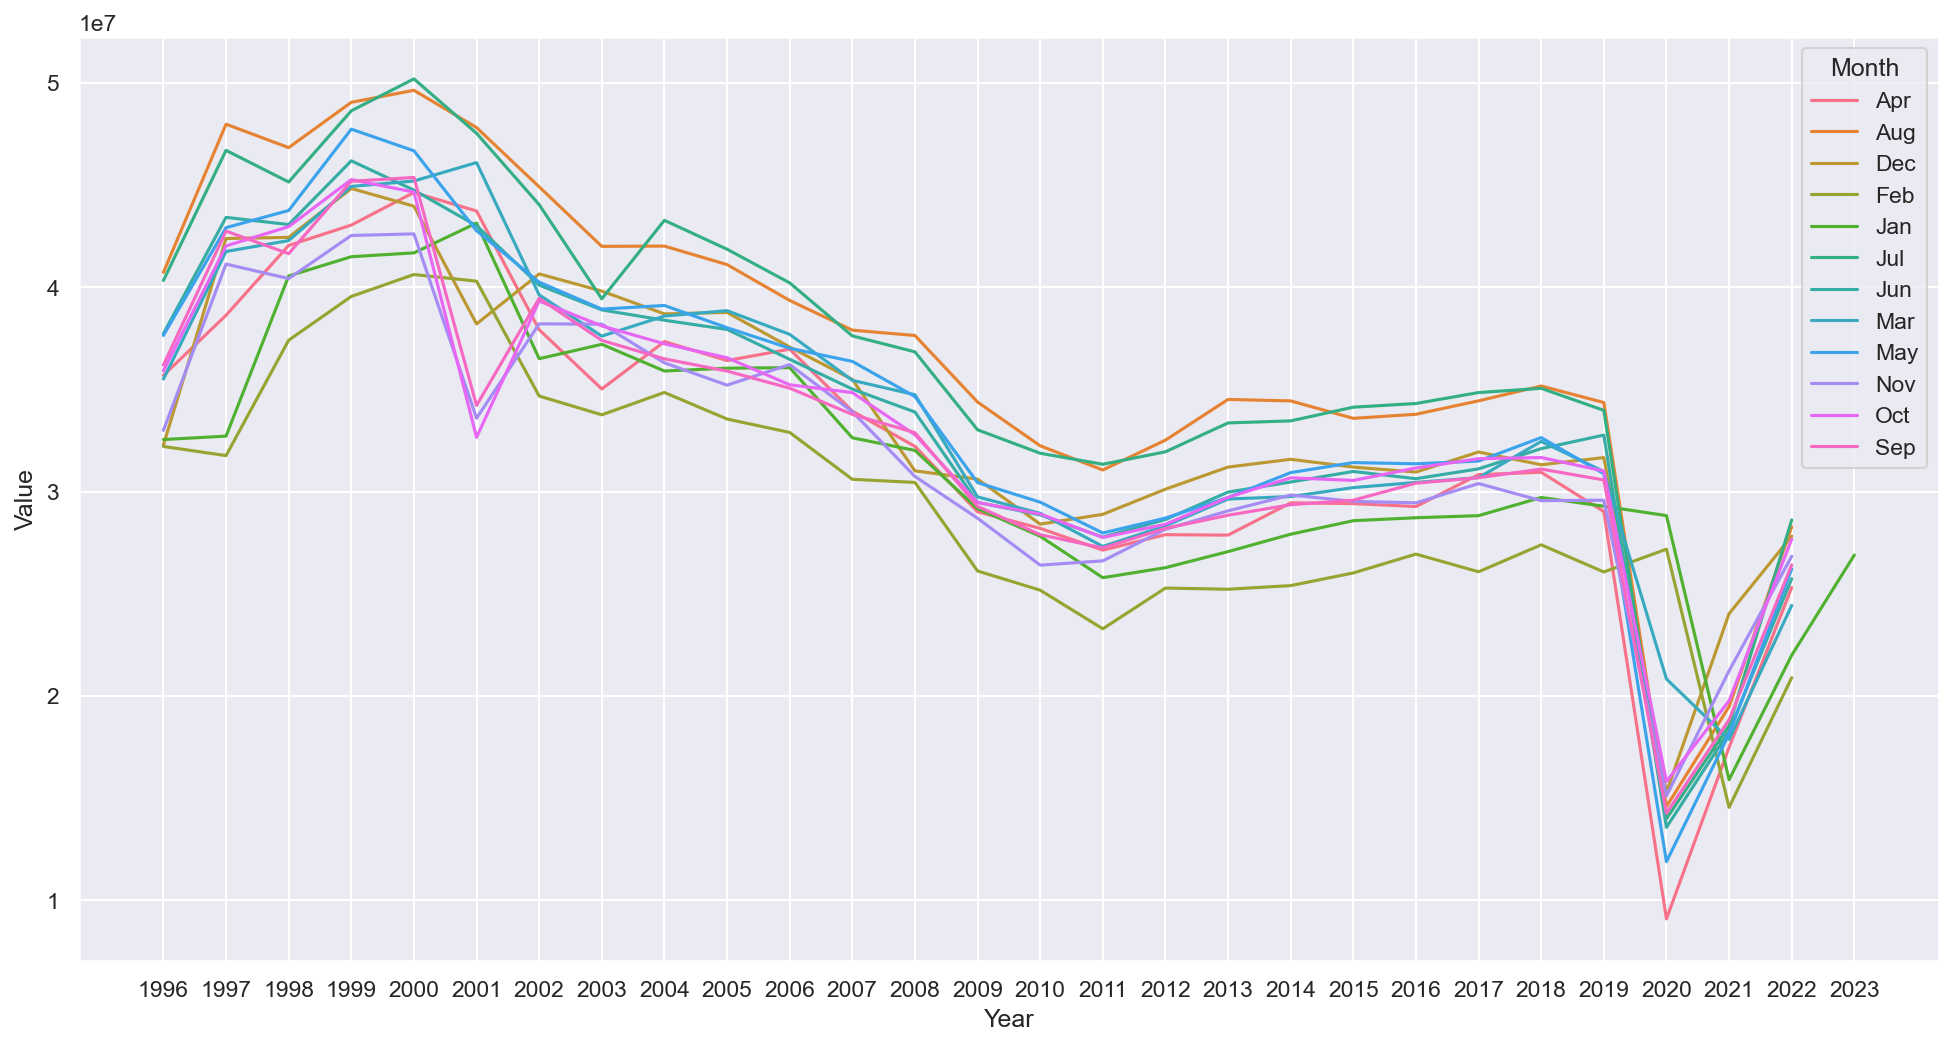

In [6]:
### CODE HERE
yearly_activity = border_crossing_full[['Month','Year','Value']].groupby(['Year','Month']).agg(sum)
sns.lineplot(yearly_activity,x='Year',y='Value',hue='Month')

*** Observations Question 2 ***

### 3. How does the mode of transportation vary over time?

In [7]:
### CODE HERE

*** Observations Question 3 ***

### 4. Are there any corrolations between historical events and the entry data?

In [8]:
### CODE HERE

*** Observations Question 4 ***

### 5. Does the activity of the most used ports change over time?

In [9]:
### CODE HERE

*** Observations Question 5 ***